In [2]:
import pandas as pd
import numpy as np


file_path = '/Users/pratyushdhavala/Desktop/capstone project/diabetes.csv'
df = pd.read_csv(file_path)

print("Data loaded successfully!")

Data loaded successfully!


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI] have minimum values as zero, which is impossible

cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Counts of '0' values in specific columns:")
print((df[cols_to_check] == 0).sum())

Counts of '0' values in specific columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [7]:
# to replace 0 with NaN, and then replacing NaN with median of specific columns

import numpy as np 


df_cleaned = df.copy()


for col in cols_to_check:

    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].replace(0, np.nan)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


for col in cols_to_check:
     if col in df_cleaned.columns:

        median_val = df_cleaned[col].median()

        df_cleaned[col] = df_cleaned[col].fillna(median_val)
     else:
        print(f"Warning: Column '{col}' not found during median imputation.")



print("\nCheck for remaining NaNs in cleaned columns (should be 0):")

processed_cols = [col for col in cols_to_check if col in df_cleaned.columns]
if processed_cols:
      print(df_cleaned[processed_cols].isnull().sum())

print("\nDescribe specific columns after imputation (min values should > 0):")
if processed_cols:
      print(df_cleaned[processed_cols].describe())


Check for remaining NaNs in cleaned columns (should be 0):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Describe specific columns after imputation (min values should > 0):
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


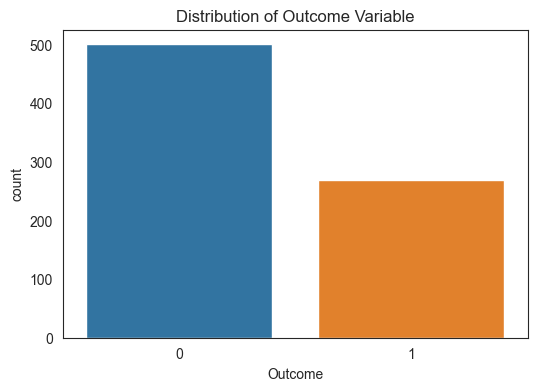

In [8]:
# to check class imbalance

import matplotlib.pyplot as plt
import seaborn as sns

print("Outcome value counts:")
print(df_cleaned['Outcome'].value_counts())

# Visualize the counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_cleaned)
plt.title('Distribution of Outcome Variable')
plt.show()

Starting Univariate Analysis for all features...

--- Analyzing Feature: Pregnancies ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


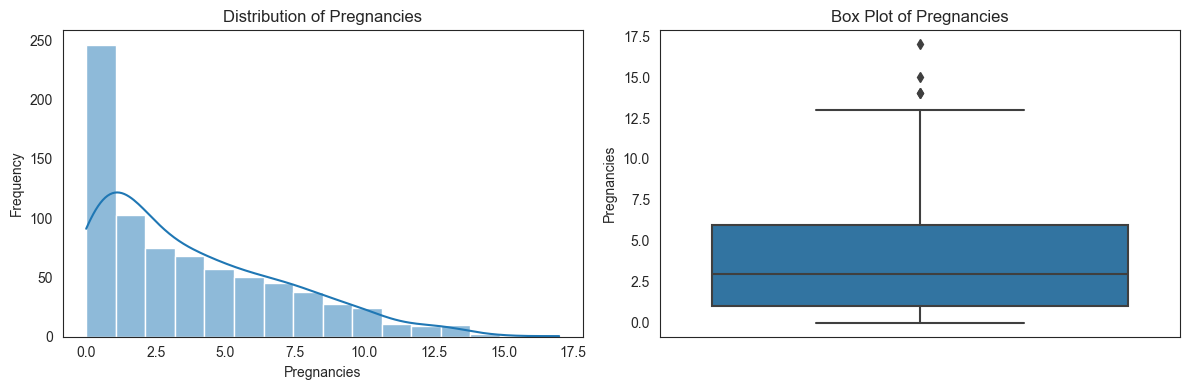


Descriptive Statistics for Pregnancies:
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: Glucose ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


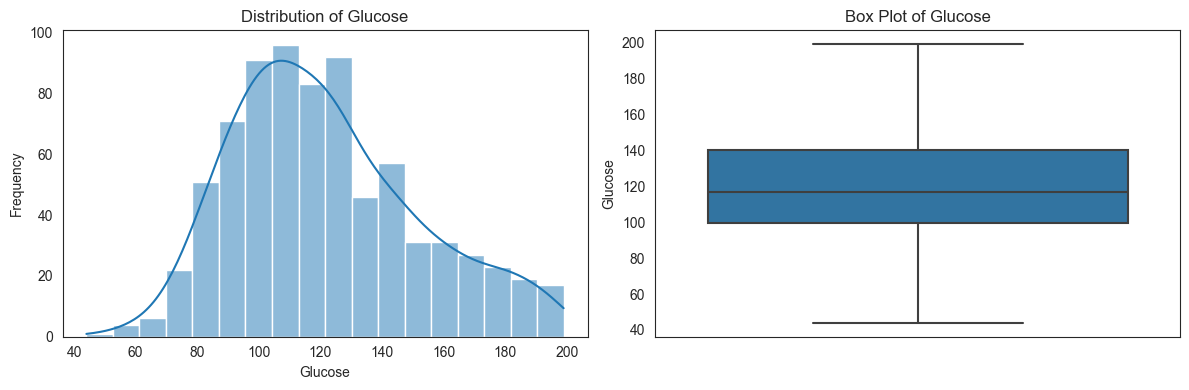


Descriptive Statistics for Glucose:
count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: BloodPressure ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


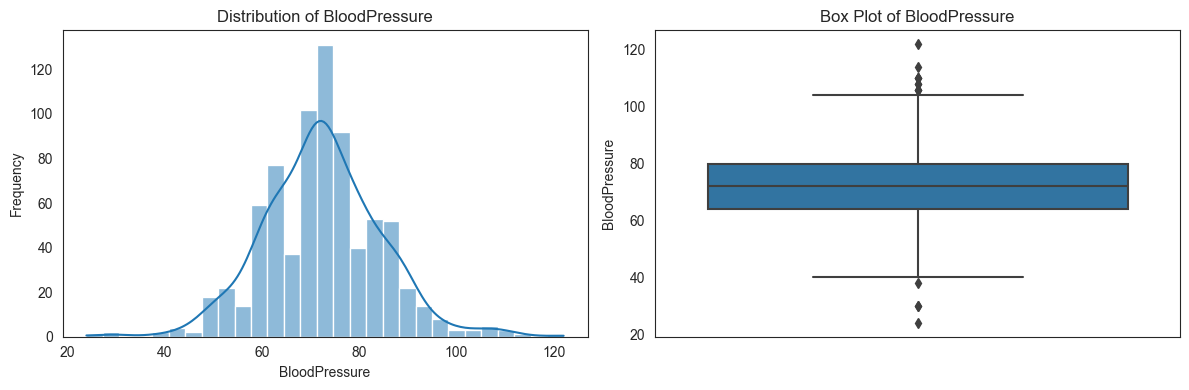


Descriptive Statistics for BloodPressure:
count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: SkinThickness ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


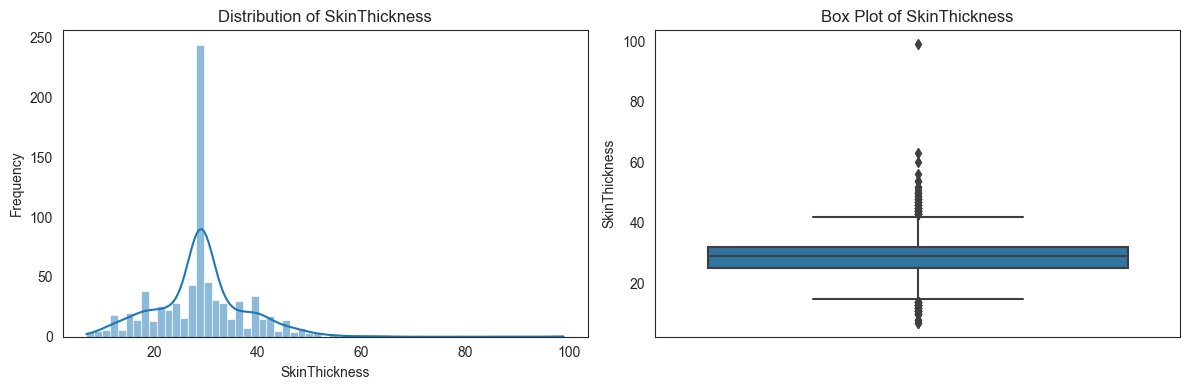


Descriptive Statistics for SkinThickness:
count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: Insulin ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


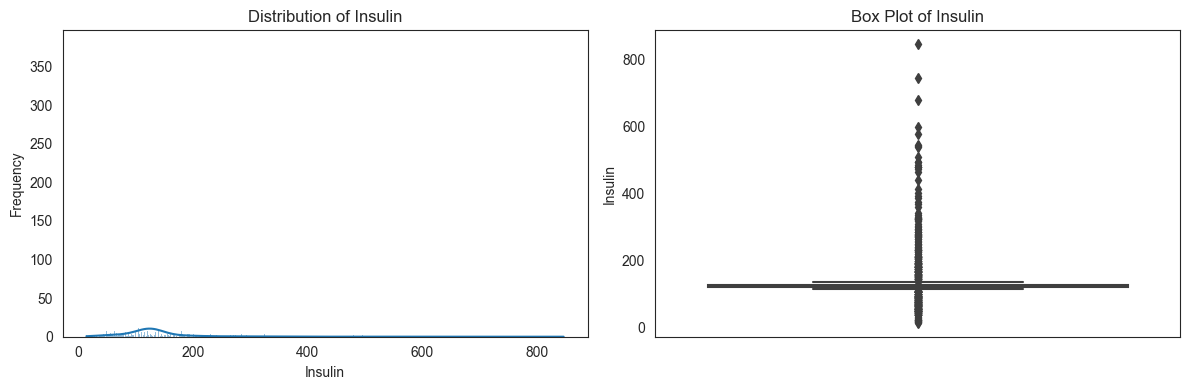


Descriptive Statistics for Insulin:
count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: BMI ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


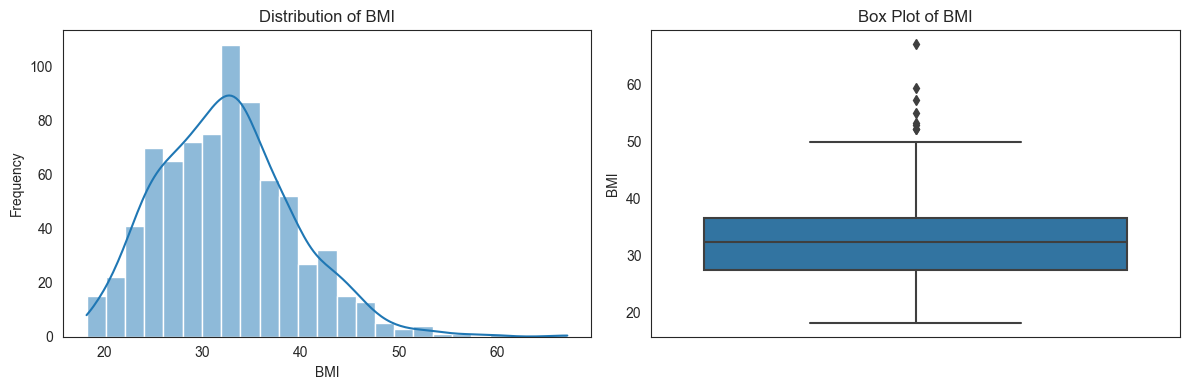


Descriptive Statistics for BMI:
count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: DiabetesPedigreeFunction ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


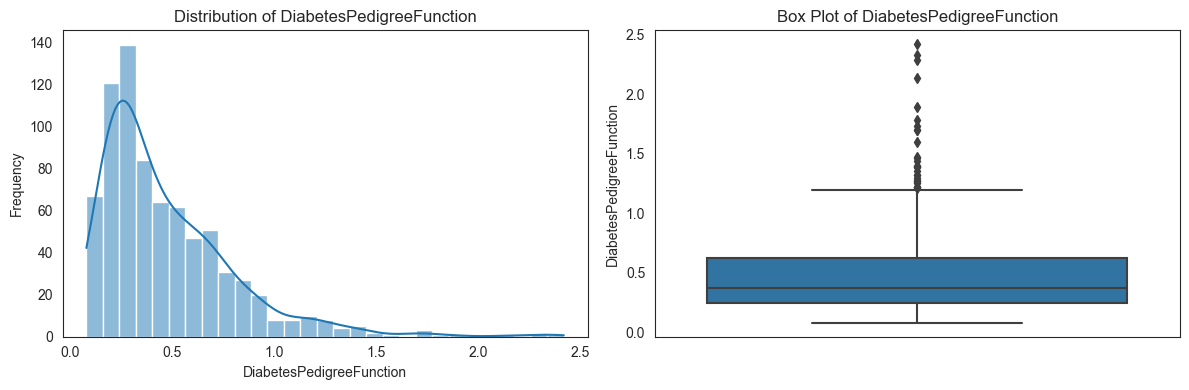


Descriptive Statistics for DiabetesPedigreeFunction:
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
------------------------------------------------------------

--- Analyzing Feature: Age ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


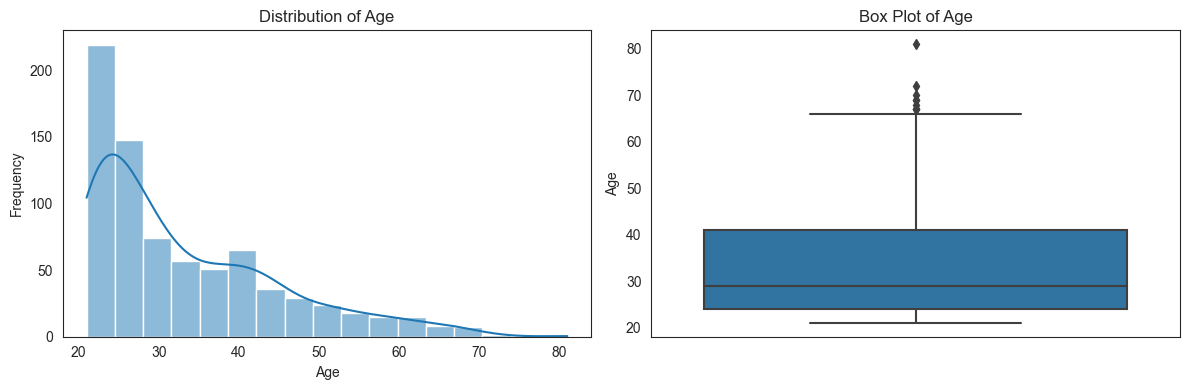


Descriptive Statistics for Age:
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
------------------------------------------------------------
Univariate analysis complete.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported
# Make sure df_cleaned is your DataFrame with zero values handled

print("Starting Univariate Analysis for all features...")


feature_columns = df_cleaned.drop('Outcome', axis=1).columns


for col in feature_columns:
    print(f"\n--- Analyzing Feature: {col} ---")


    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(data=df_cleaned, y=col, ax=axes[1]) 
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col) 

    plt.tight_layout()

    plt.show()

    
    print(f"\nDescriptive Statistics for {col}:")
    print(df_cleaned[col].describe())
    print("-" * 60) # Add a separator line

print("Univariate analysis complete.")

Starting Bivariate Analysis (Features vs. Outcome)...

--- Analyzing Pregnancies vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


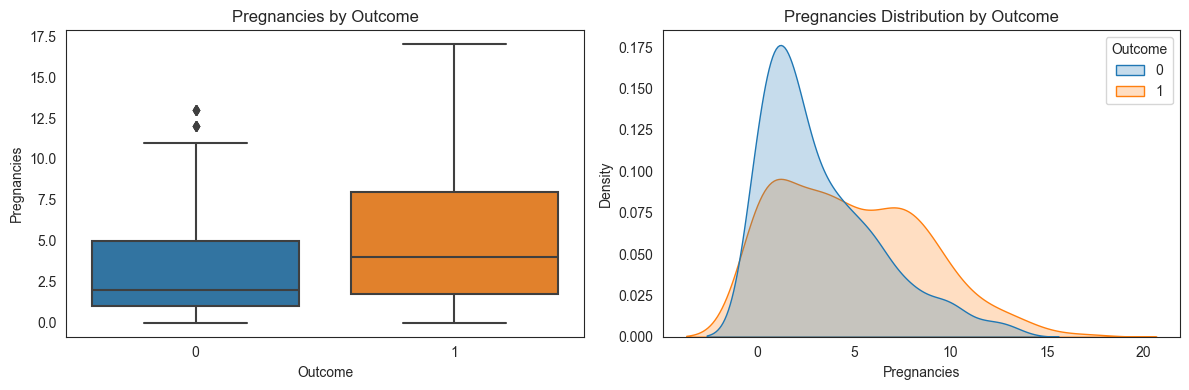

------------------------------------------------------------

--- Analyzing Glucose vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


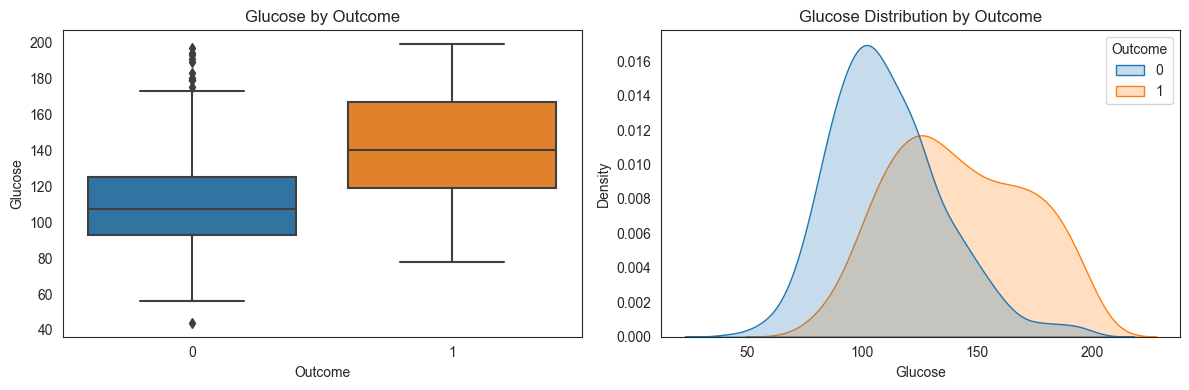

------------------------------------------------------------

--- Analyzing BloodPressure vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


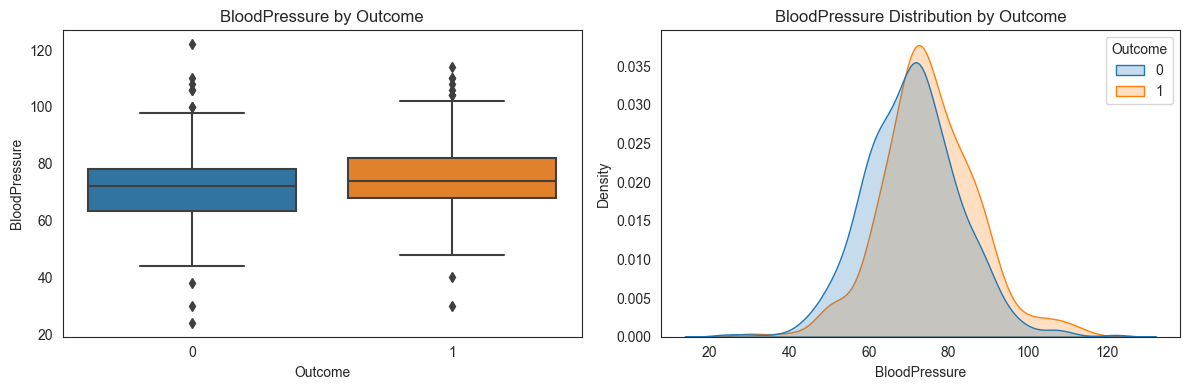

------------------------------------------------------------

--- Analyzing SkinThickness vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


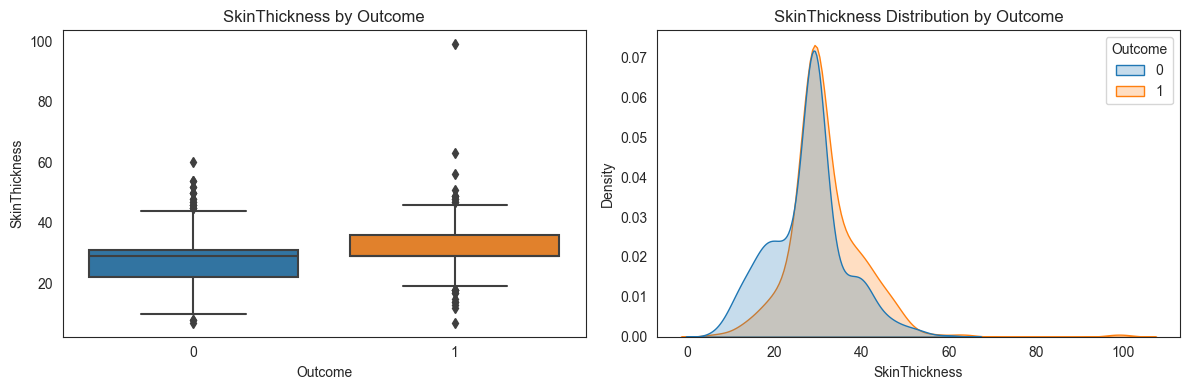

------------------------------------------------------------

--- Analyzing Insulin vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


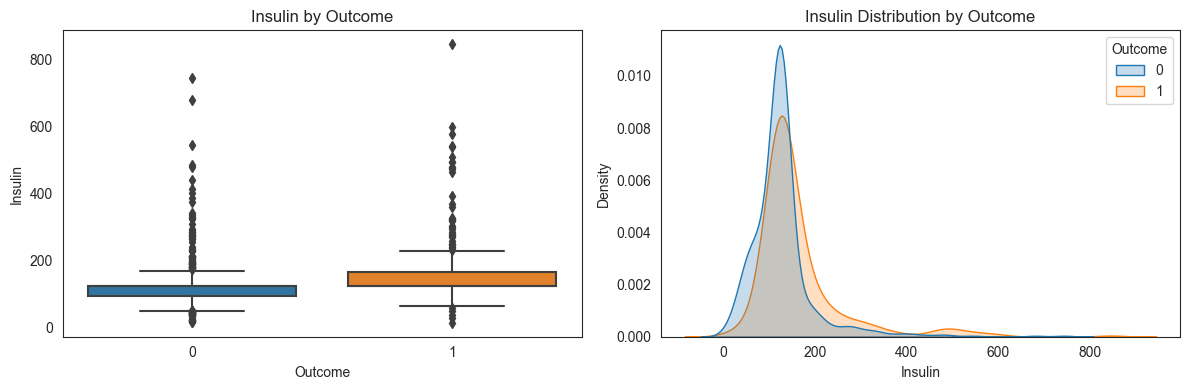

------------------------------------------------------------

--- Analyzing BMI vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


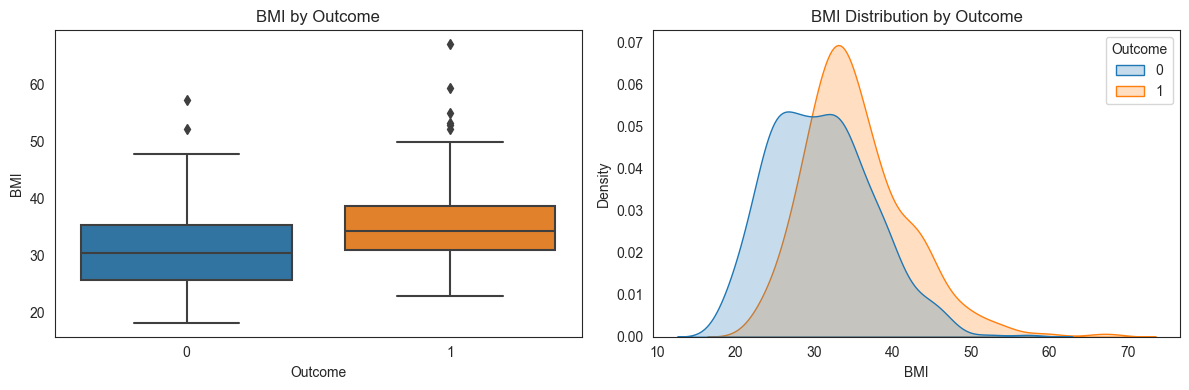

------------------------------------------------------------

--- Analyzing DiabetesPedigreeFunction vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


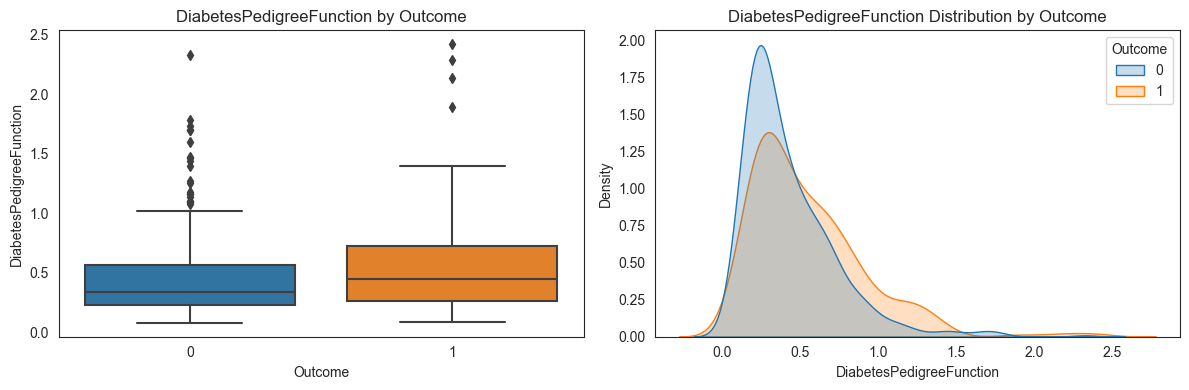

------------------------------------------------------------

--- Analyzing Age vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


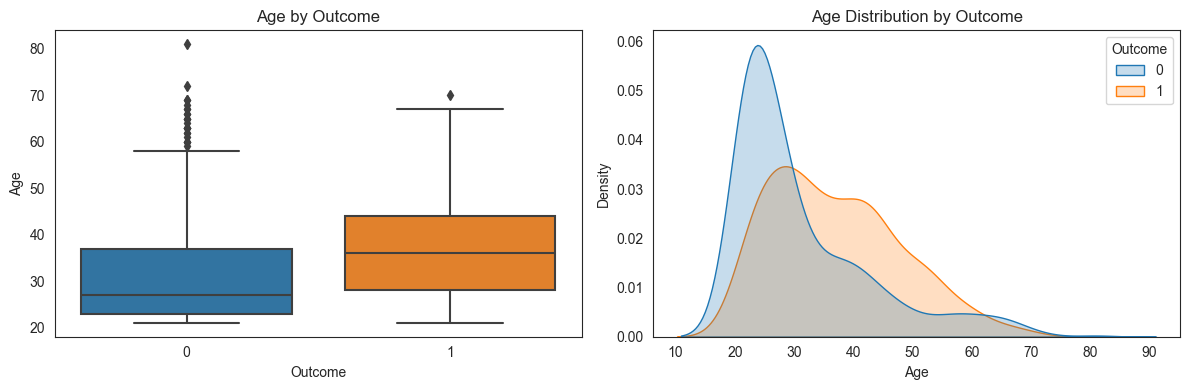

------------------------------------------------------------
Bivariate analysis (Features vs. Outcome) complete.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

print("Starting Bivariate Analysis (Features vs. Outcome)...")


target_column = 'Outcome'

feature_columns = df_cleaned.drop(target_column, axis=1).columns


for col in feature_columns:
    print(f"\n--- Analyzing {col} vs {target_column} ---")

    # Create a figure with two subplots, arranged side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 1. Box Plot comparing feature values per Outcome group
    sns.boxplot(x=target_column, y=col, data=df_cleaned, ax=axes[0])
    axes[0].set_title(f'{col} by {target_column}')
    axes[0].set_xlabel(target_column) # Ensure x-axis label is set
    axes[0].set_ylabel(col) # Ensure y-axis label is set

    # 2. KDE Plot comparing feature distributions per Outcome group
    sns.kdeplot(data=df_cleaned, x=col, hue=target_column, fill=True, common_norm=False, ax=axes[1])

    axes[1].set_title(f'{col} Distribution by {target_column}')
    axes[1].set_xlabel(col)

    # Improve layout
    plt.tight_layout()

    # Display the plots for the current feature
    plt.show()
    print("-" * 60) 

print("Bivariate analysis (Features vs. Outcome) complete.")

--- Generating Correlation Matrix Heatmap (Larger Size) ---


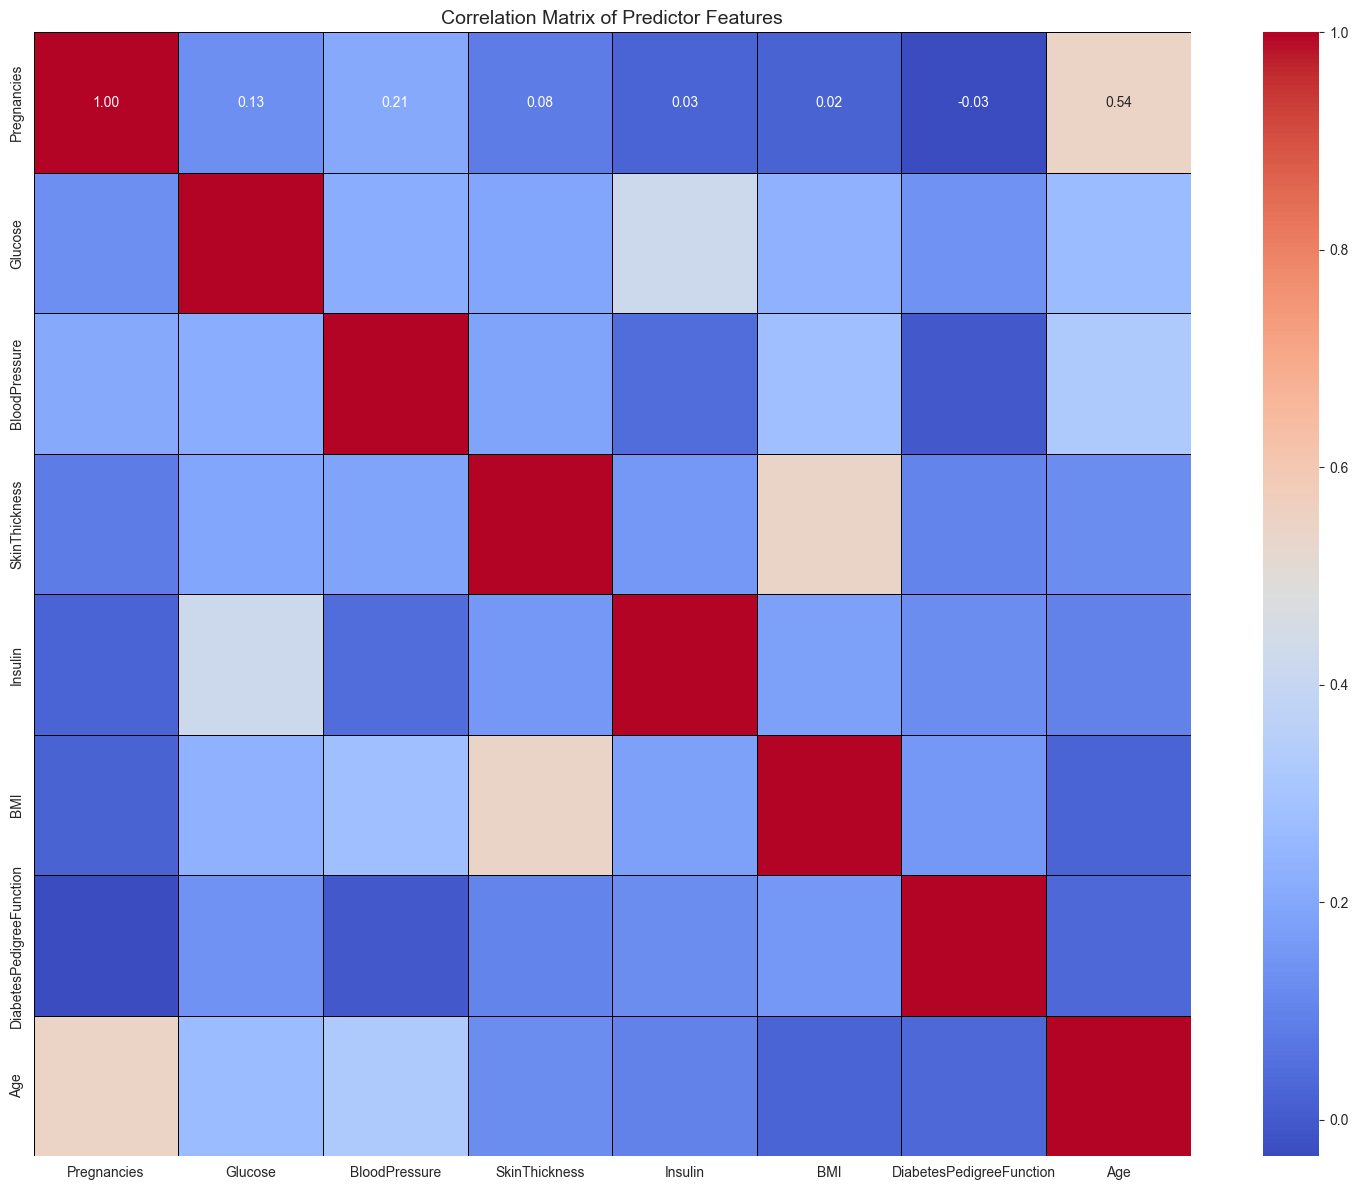

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_cleaned exists
print("--- Generating Correlation Matrix Heatmap (Larger Size) ---")
sns.set_style("white")
try:
    correlation_matrix = df_cleaned.drop('Outcome', axis=1).corr()


    plt.figure(figsize=(15, 12))

    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        linecolor='black' 
    )
    plt.title('Correlation Matrix of Predictor Features', fontsize=14)
    plt.tight_layout() 
    plt.show()
except KeyError:
    print("Error: 'Outcome' column not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [13]:
# Assuming df_cleaned is your final DataFrame after EDA
X = df_cleaned.drop('Outcome', axis=1) 
y = df_cleaned['Outcome']             

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

Shape of features (X): (768, 8)
Shape of target (y): (768,)

First 5 rows of X:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

First 5 rows of y:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [14]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Verify stratification (proportions should be similar)
print("\nOutcome proportion in y_train:")
print(y_train.value_counts(normalize=True))
print("\nOutcome proportion in y_test:")
print(y_test.value_counts(normalize=True))



Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)

Outcome proportion in y_train:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Outcome proportion in y_test:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd 


scaler = StandardScaler()

# Fit the scaler on the training features and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features using the *same* scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFirst 5 rows of scaled X_train:")
print(X_train_scaled.head())

print("\nDescribe scaled X_train:")
print(X_train_scaled.describe().round(2)) 


First 5 rows of scaled X_train:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.851355 -1.056427      -0.826740      -1.918187 -1.203361 -0.769477   
1     0.356576  0.144399       0.477772      -0.229874 -1.470195 -0.417498   
2    -0.549372 -0.556083      -1.152868       1.233330 -0.555335  0.359790   
3    -0.851355  0.811525      -1.315932      -0.004766 -0.161437 -0.402832   
4    -1.153338 -0.889646      -0.663676       1.120776 -0.415565  1.782373   

   DiabetesPedigreeFunction       Age  
0                  0.310794 -0.792169  
1                 -0.116439  0.561034  
2                 -0.764862 -0.707594  
3                  0.262314 -0.369293  
4                 -0.337630 -0.961320  

Describe scaled X_train:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       614.00   614.00         614.00         614.00   614.00  614.00   
mean         -0.00    -0.00           0.00          -0.00    -0.00   -0.00  

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd 

# Assuming X_train_scaled, y_train are ready from the previous steps

print("--- Processing: Logistic Regression ---")


log_reg_default = LogisticRegression(random_state=42, max_iter=1000)

--- Processing: Logistic Regression ---


In [18]:
# Define the cross-validation strategy (use the same one for tuning later)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0), # Handles cases with no predicted positives
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

print("\nCalculating baseline performance using 5-fold Cross-Validation...")
# Perform cross-validation
cv_results_default = cross_validate(log_reg_default, X_train_scaled, y_train,
                                    cv=cv_strategy, scoring=scoring_metrics)

# Print the mean and std deviation for each metric
print("\nDefault Logistic Regression Baseline Performance (Mean +/- Std Dev):")
for metric in scoring_metrics.keys():
    mean_score = np.mean(cv_results_default[f'test_{metric}'])
    std_score = np.std(cv_results_default[f'test_{metric}'])
    print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")


Calculating baseline performance using 5-fold Cross-Validation...

Default Logistic Regression Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7866 +/- 0.0193
  Precision: 0.7623 +/- 0.0604
  Recall: 0.5701 +/- 0.0180
  F1: 0.6511 +/- 0.0237
  Roc_auc: 0.7363 +/- 0.0160


In [20]:
# Define the parameter grid to search
# Note: 'lbfgs' solver supports only 'l2' or None penalties.
# 'liblinear' supports 'l1' and 'l2'.
# 'saga' supports 'elasticnet', 'l1', 'l2', None.
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'],             # Type of regularization
    'solver': ['liblinear', 'saga']      # Solvers supporting l1/l2 ('saga' might need more max_iter)
    # Note: We could add 'elasticnet' penalty and 'l1_ratio' if using 'saga' exclusively
}

# Initialize a new model instance for GridSearchCV
log_reg_tuning = LogisticRegression(random_state=42, max_iter=2000) # Allow more iterations for saga

In [21]:
print("\nStarting Hyperparameter Tuning using GridSearchCV...")
# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=log_reg_tuning,
    param_grid=param_grid_lr,
    scoring='roc_auc',  # Choose primary metric (e.g., roc_auc or f1)
    cv=cv_strategy,
    n_jobs=-1,         # Use all available CPU cores
    verbose=1          # Show progress messages
)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Print the best parameters found
print(f"\nBest Parameters found: {grid_search_lr.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_lr.scoring}): {grid_search_lr.best_score_:.4f}")

# Store the best model found by the grid search
best_log_reg_model = grid_search_lr.best_estimator_


Starting Hyperparameter Tuning using GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validated Score (roc_auc): 0.8443


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

print("\n--- Processing: K-Nearest Neighbors (KNN) ---")
knn_default = KNeighborsClassifier()

print("\nCalculating KNN baseline performance using 5-fold Cross-Validation...")

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results_knn = cross_validate(knn_default, X_train_scaled, y_train,
                                cv=cv_strategy, scoring=scoring_metrics)

print("\nDefault KNN Baseline Performance (Mean +/- Std Dev):")
for metric in scoring_metrics.keys():
    metric_key = f'test_{metric}'
    if metric_key in cv_results_knn:
        mean_score = np.mean(cv_results_knn[metric_key])
        std_score = np.std(cv_results_knn[metric_key])
        print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
    else:
        print(f"  {metric.capitalize()}: Not calculated")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

print("\nStarting KNN Hyperparameter Tuning using GridSearchCV...")
knn_tuning = KNeighborsClassifier()
grid_search_knn = GridSearchCV(
    estimator=knn_tuning,
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
grid_search_knn.fit(X_train_scaled, y_train)

print(f"\nBest Parameters found for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_knn.scoring}): {grid_search_knn.best_score_:.4f}")
best_knn_model = grid_search_knn.best_estimator_
print("Stored best KNN model.")


--- Processing: K-Nearest Neighbors (KNN) ---

Calculating KNN baseline performance using 5-fold Cross-Validation...

Default KNN Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7247 +/- 0.0414
  Precision: 0.6287 +/- 0.0863
  Recall: 0.5561 +/- 0.0480
  F1: 0.5858 +/- 0.0454
  Roc_auc: 0.6856 +/- 0.0343

Starting KNN Hyperparameter Tuning using GridSearchCV...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters found for KNN: {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validated Score (roc_auc): 0.8352
Stored best KNN model.


In [25]:

from sklearn.tree import DecisionTreeClassifier
print("\n--- Processing: Decision Tree ---")
dt_default = DecisionTreeClassifier(random_state=42)


print("\nCalculating Decision Tree baseline performance...")
cv_results_dt = cross_validate(dt_default, X_train_scaled, y_train,
                               cv=cv_strategy, scoring=scoring_metrics)
print("\nDefault Decision Tree Baseline Performance (Mean +/- Std Dev):")

for metric in scoring_metrics.keys():
    metric_key = f'test_{metric}'
    if metric_key in cv_results_dt:
        mean_score = np.mean(cv_results_dt[metric_key])
        std_score = np.std(cv_results_dt[metric_key])
        print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
    else:
        print(f"  {metric.capitalize()}: Not calculated")


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10]
}


print("\nStarting Decision Tree Hyperparameter Tuning...")
dt_tuning = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt_tuning,
    param_grid=param_grid_dt,
    scoring='roc_auc', 
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
grid_search_dt.fit(X_train_scaled, y_train)


print(f"\nBest Parameters found for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_dt.scoring}): {grid_search_dt.best_score_:.4f}")
best_dt_model = grid_search_dt.best_estimator_
print("Stored best Decision Tree model.")




--- Processing: Decision Tree ---

Calculating Decision Tree baseline performance...

Default Decision Tree Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.6645 +/- 0.0079
  Precision: 0.5177 +/- 0.0127
  Recall: 0.5656 +/- 0.0488
  F1: 0.5393 +/- 0.0214
  Roc_auc: 0.6415 +/- 0.0122

Starting Decision Tree Hyperparameter Tuning...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best Parameters found for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validated Score (roc_auc): 0.7792
Stored best Decision Tree model.


In [26]:

from sklearn.ensemble import RandomForestClassifier
print("\n--- Processing: Random Forest ---")

rf_default = RandomForestClassifier(random_state=42, n_jobs=-1)

# === Step 2: Baseline Performance ===
print("\nCalculating Random Forest baseline performance...")
cv_results_rf = cross_validate(rf_default, X_train_scaled, y_train,
                               cv=cv_strategy, scoring=scoring_metrics)
print("\nDefault Random Forest Baseline Performance (Mean +/- Std Dev):")

for metric in scoring_metrics.keys():
    metric_key = f'test_{metric}'
    if metric_key in cv_results_rf:
        mean_score = np.mean(cv_results_rf[metric_key])
        std_score = np.std(cv_results_rf[metric_key])
        print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
    else:
        print(f"  {metric.capitalize()}: Not calculated")

param_grid_rf = {
    'n_estimators': [100, 200],          
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 3],          
    
}


print("\nStarting Random Forest Hyperparameter Tuning (This may take longer)...")
rf_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(
    estimator=rf_tuning,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1, 
    verbose=1
)
grid_search_rf.fit(X_train_scaled, y_train)


print(f"\nBest Parameters found for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_rf.scoring}): {grid_search_rf.best_score_:.4f}")
best_rf_model = grid_search_rf.best_estimator_
print("Stored best Random Forest model.")




--- Processing: Random Forest ---

Calculating Random Forest baseline performance...

Default Random Forest Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7655 +/- 0.0197
  Precision: 0.6994 +/- 0.0550
  Recall: 0.5842 +/- 0.0157
  F1: 0.6351 +/- 0.0174
  Roc_auc: 0.7233 +/- 0.0134

Starting Random Forest Hyperparameter Tuning (This may take longer)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters found for Random Forest: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Score (roc_auc): 0.8304
Stored best Random Forest model.


In [28]:

from sklearn.svm import SVC
print("\n--- Processing: Support Vector Machine (SVM) ---")

svm_default = SVC(random_state=42, probability=True)


print("\nCalculating SVM baseline performance...")
cv_results_svm = cross_validate(svm_default, X_train_scaled, y_train,
                                cv=cv_strategy, scoring=scoring_metrics)
print("\nDefault SVM Baseline Performance (Mean +/- Std Dev):")
for metric in scoring_metrics.keys():
    metric_key = f'test_{metric}'
    if metric_key in cv_results_svm:
        mean_score = np.mean(cv_results_svm[metric_key])
        std_score = np.std(cv_results_svm[metric_key])
        print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
    else:
        print(f"  {metric.capitalize()}: Not calculated")


param_grid_svm = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10] 
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10], 
        'gamma': ['scale', 'auto', 0.1, 0.01] 
                                            
    }

]


print("\nStarting SVM Hyperparameter Tuning (This can take some time)...")
svm_tuning = SVC(random_state=42, probability=True)
grid_search_svm = GridSearchCV(
    estimator=svm_tuning,
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
grid_search_svm.fit(X_train_scaled, y_train)


print(f"\nBest Parameters found for SVM: {grid_search_svm.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_svm.scoring}): {grid_search_svm.best_score_:.4f}")
best_svm_model = grid_search_svm.best_estimator_
print("Stored best SVM model.")




--- Processing: Support Vector Machine (SVM) ---

Calculating SVM baseline performance...

Default SVM Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7785 +/- 0.0079
  Precision: 0.7423 +/- 0.0572
  Recall: 0.5749 +/- 0.0674
  F1: 0.6422 +/- 0.0244
  Roc_auc: 0.7312 +/- 0.0143

Starting SVM Hyperparameter Tuning (This can take some time)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters found for SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validated Score (roc_auc): 0.8464
Stored best SVM model.


In [29]:

from sklearn.naive_bayes import GaussianNB
print("\n--- Processing: Gaussian Naive Bayes (GNB) ---")
gnb_default = GaussianNB() 


print("\nCalculating GNB baseline performance...")
cv_results_gnb = cross_validate(gnb_default, X_train_scaled, y_train,
                                cv=cv_strategy, scoring=scoring_metrics)
print("\nDefault GNB Baseline Performance (Mean +/- Std Dev):")
for metric in scoring_metrics.keys():
    metric_key = f'test_{metric}'
    if metric_key in cv_results_gnb:
        mean_score = np.mean(cv_results_gnb[metric_key])
        std_score = np.std(cv_results_gnb[metric_key])
        print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
    else:
        print(f"  {metric.capitalize()}: Not calculated")

param_grid_gnb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6] 
}


print("\nStarting GNB Hyperparameter Tuning...")
gnb_tuning = GaussianNB()
grid_search_gnb = GridSearchCV(
    estimator=gnb_tuning,
    param_grid=param_grid_gnb,
    scoring='roc_auc', 
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
grid_search_gnb.fit(X_train_scaled, y_train)


print(f"\nBest Parameters found for GNB: {grid_search_gnb.best_params_}")
print(f"Best Cross-Validated Score ({grid_search_gnb.scoring}): {grid_search_gnb.best_score_:.4f}")
best_gnb_model = grid_search_gnb.best_estimator_
print("Stored best GNB model.")


--- Processing: Gaussian Naive Bayes (GNB) ---

Calculating GNB baseline performance...

Default GNB Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7623 +/- 0.0280
  Precision: 0.6859 +/- 0.0587
  Recall: 0.5984 +/- 0.0517
  F1: 0.6369 +/- 0.0384
  Roc_auc: 0.7242 +/- 0.0279

Starting GNB Hyperparameter Tuning...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters found for GNB: {'var_smoothing': 1e-11}
Best Cross-Validated Score (roc_auc): 0.8280
Stored best GNB model.


In [33]:

try:
    from xgboost import XGBClassifier
    print("\n--- Processing: XGBoost ---")

    xgb_default = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


    print("\nCalculating XGBoost baseline performance...")
    cv_results_xgb = cross_validate(xgb_default, X_train_scaled, y_train,
                                    cv=cv_strategy, scoring=scoring_metrics)
    print("\nDefault XGBoost Baseline Performance (Mean +/- Std Dev):")
    
    for metric in scoring_metrics.keys():
        metric_key = f'test_{metric}'
        if metric_key in cv_results_xgb:
            mean_score = np.mean(cv_results_xgb[metric_key])
            std_score = np.std(cv_results_xgb[metric_key])
            print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
        else:
            print(f"  {metric.capitalize()}: Not calculated")


    param_grid_xgb = {
        'n_estimators': [50, 100],          
        'max_depth': [3, 5],               
        'learning_rate': [0.1, 0.05],      
       
    }


    print("\nStarting XGBoost Hyperparameter Tuning (This can take significant time)...")
    xgb_tuning = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid_search_xgb = GridSearchCV(
        estimator=xgb_tuning,
        param_grid=param_grid_xgb,
        scoring='roc_auc',
        cv=cv_strategy,
        n_jobs=-1,
        verbose=1
    )
    grid_search_xgb.fit(X_train_scaled, y_train)


    print(f"\nBest Parameters found for XGBoost: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validated Score ({grid_search_xgb.scoring}): {grid_search_xgb.best_score_:.4f}")
    best_xgb_model = grid_search_xgb.best_estimator_
    print("Stored best XGBoost model.")

except ImportError:
    print("\nXGBoost not installed. Skipping XGBoost steps.")
    print("To install, run: conda install -c conda-forge xgboost  OR  pip install xgboost")
    best_xgb_model = None # Indicate model was skipped


--- Processing: XGBoost ---

Calculating XGBoost baseline performance...


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:


Default XGBoost Baseline Performance (Mean +/- Std Dev):
  Accuracy: 0.7442 +/- 0.0384
  Precision: 0.6509 +/- 0.0776
  Recall: 0.6028 +/- 0.0258
  F1: 0.6233 +/- 0.0378
  Roc_auc: 0.7114 +/- 0.0306

Starting XGBoost Hyperparameter Tuning (This can take significant time)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters found for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validated Score (roc_auc): 0.8281
Stored best XGBoost model.


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [08:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

In [35]:

try:
    from lightgbm import LGBMClassifier
    print("\n--- Processing: LightGBM ---")
    lgbm_default = LGBMClassifier(random_state=42)


    print("\nCalculating LightGBM baseline performance...")
    cv_results_lgbm = cross_validate(lgbm_default, X_train_scaled, y_train,
                                     cv=cv_strategy, scoring=scoring_metrics)
    print("\nDefault LightGBM Baseline Performance (Mean +/- Std Dev):")
   
    
    for metric in scoring_metrics.keys():
        metric_key = f'test_{metric}'
        if metric_key in cv_results_lgbm:
            mean_score = np.mean(cv_results_lgbm[metric_key])
            std_score = np.std(cv_results_lgbm[metric_key])
            print(f"  {metric.capitalize()}: {mean_score:.4f} +/- {std_score:.4f}")
        else:
            print(f"  {metric.capitalize()}: Not calculated")

    
    param_grid_lgbm = {
        'n_estimators': [50, 100],
        'max_depth': [-1, 5, 10],      
        'learning_rate': [0.1, 0.05],
        'num_leaves': [31, 50]       
    }

 
    print("\nStarting LightGBM Hyperparameter Tuning (This can also take time)...")
    lgbm_tuning = LGBMClassifier(random_state=42)
    grid_search_lgbm = GridSearchCV(
        estimator=lgbm_tuning,
        param_grid=param_grid_lgbm,
        scoring='roc_auc', 
        cv=cv_strategy,
        n_jobs=-1,
        verbose=1
    )
    grid_search_lgbm.fit(X_train_scaled, y_train)


    print(f"\nBest Parameters found for LightGBM: {grid_search_lgbm.best_params_}")
    print(f"Best Cross-Validated Score ({grid_search_lgbm.scoring}): {grid_search_lgbm.best_score_:.4f}")
    best_lgbm_model = grid_search_lgbm.best_estimator_
    print("Stored best LightGBM model.")

except ImportError:
    print("\nLightGBM not installed. Skipping LightGBM steps.")
    print("To install, run: conda install -c conda-forge lightgbm  OR  pip install lightgbm")
    best_lgbm_model = None 


--- Processing: LightGBM ---

Calculating LightGBM baseline performance...
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 172, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You 

[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 172, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 491, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Evaluating the following 8 models: ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'GaussianNB', 'XGBoost', 'LightGBM']

--- Evaluating Tuned Models on the Unseen Test Set ---

--- Evaluating: Logistic Regression ---
  Accuracy: 0.6883
  Precision: 0.5652
  Recall: 0.4815
  F1-Score: 0.5200
  AUC: 0.8104


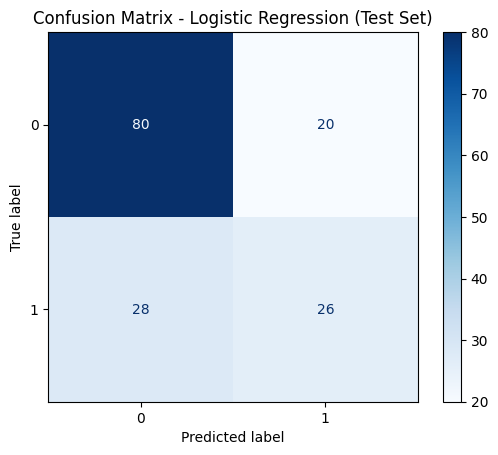


--- Evaluating: KNN ---
  Accuracy: 0.7468
  Precision: 0.6667
  Recall: 0.5556
  F1-Score: 0.6061
  AUC: 0.8076


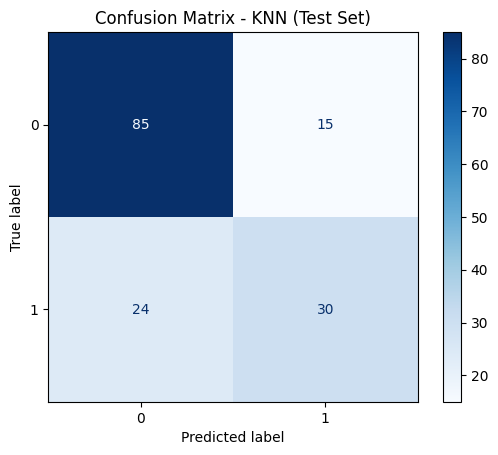


--- Evaluating: Decision Tree ---
  Accuracy: 0.6883
  Precision: 0.6250
  Recall: 0.2778
  F1-Score: 0.3846
  AUC: 0.8109


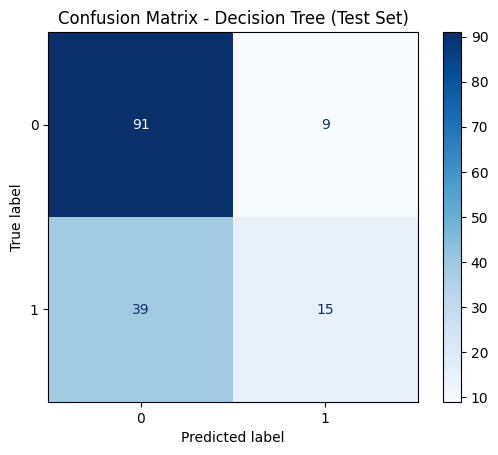


--- Evaluating: Random Forest ---
  Accuracy: 0.7532
  Precision: 0.6818
  Recall: 0.5556
  F1-Score: 0.6122
  AUC: 0.8157


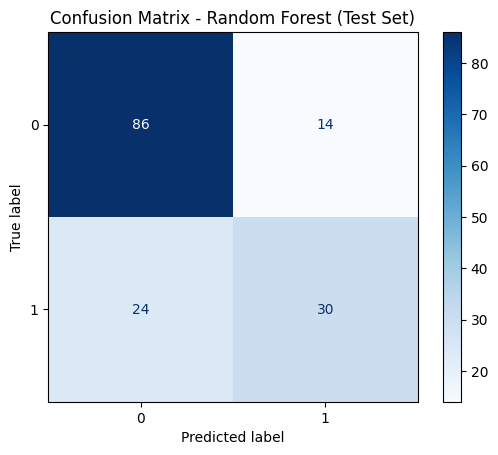


--- Evaluating: SVM ---
  Accuracy: 0.7078
  Precision: 0.6098
  Recall: 0.4630
  F1-Score: 0.5263
  AUC: 0.8052


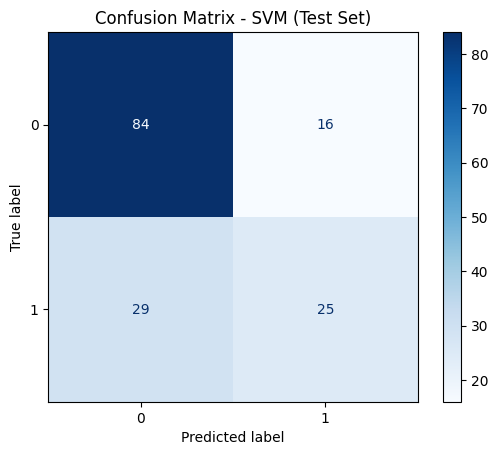


--- Evaluating: GaussianNB ---
  Accuracy: 0.7013
  Precision: 0.5667
  Recall: 0.6296
  F1-Score: 0.5965
  AUC: 0.7646


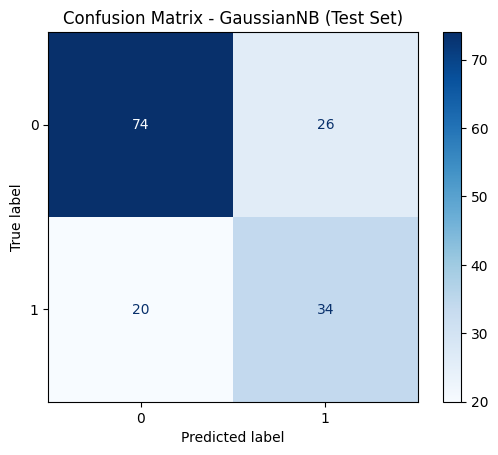


--- Evaluating: XGBoost ---
  Accuracy: 0.7273
  Precision: 0.6364
  Recall: 0.5185
  F1-Score: 0.5714
  AUC: 0.8189


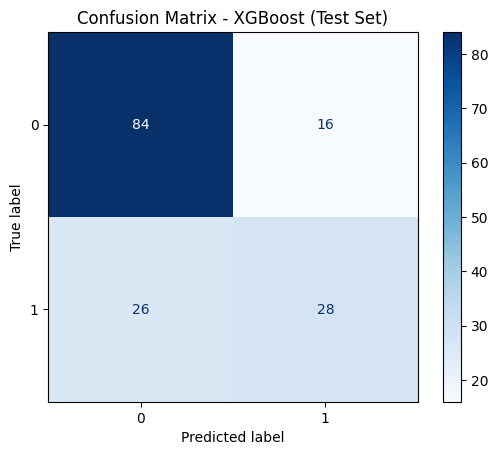


--- Evaluating: LightGBM ---
  Accuracy: 0.7727
  Precision: 0.7021
  Recall: 0.6111
  F1-Score: 0.6535
  AUC: 0.8280


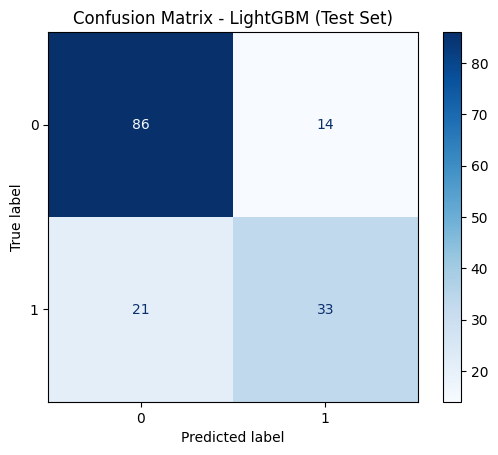


--- Final Test Set Performance Summary ---
                     Accuracy     AUC  F1-Score  Precision  Recall
LightGBM               0.7727  0.8280    0.6535     0.7021  0.6111
XGBoost                0.7273  0.8189    0.5714     0.6364  0.5185
Random Forest          0.7532  0.8157    0.6122     0.6818  0.5556
Decision Tree          0.6883  0.8109    0.3846     0.6250  0.2778
Logistic Regression    0.6883  0.8104    0.5200     0.5652  0.4815
KNN                    0.7468  0.8076    0.6061     0.6667  0.5556
SVM                    0.7078  0.8052    0.5263     0.6098  0.4630
GaussianNB             0.7013  0.7646    0.5965     0.5667  0.6296

Model evaluation complete.


In [41]:
# Import necessary functions
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Needed for checking None and for NaN

# --- Step 1: Gather all tuned models ---

tuned_models = {
    "Logistic Regression": best_log_reg_model if 'best_log_reg_model' in locals() else None,
    "KNN": best_knn_model if 'best_knn_model' in locals() else None,
    "Decision Tree": best_dt_model if 'best_dt_model' in locals() else None,
    "Random Forest": best_rf_model if 'best_rf_model' in locals() else None,
    "SVM": best_svm_model if 'best_svm_model' in locals() else None,
    "GaussianNB": best_gnb_model if 'best_gnb_model' in locals() else None,
    "XGBoost": best_xgb_model if 'best_xgb_model' in locals() else None,
    "LightGBM": best_lgbm_model if 'best_lgbm_model' in locals() else None
}

# Filter out any models that are None (failed to train/tune)
valid_tuned_models = {name: model for name, model in tuned_models.items() if model is not None}
if not valid_tuned_models:
    print("Error: No valid tuned models found. Please check previous steps.")
else:
    print(f"Evaluating the following {len(valid_tuned_models)} models: {list(valid_tuned_models.keys())}")

    # Dictionary to store test set results
    test_results = {}

    # --- Step 2: Iterate and Evaluate on Test Set ---
    print("\n--- Evaluating Tuned Models on the Unseen Test Set ---")

    for name, model in valid_tuned_models.items():
        print(f"\n--- Evaluating: {name} ---")


        y_pred = model.predict(X_test_scaled)

        # --- Calculate Metrics ---
        accuracy = accuracy_score(y_test, y_pred)

        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        auc = np.nan 
        if hasattr(model, "predict_proba"):
            try:

                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                auc = roc_auc_score(y_test, y_pred_proba)
            except Exception as e:
                print(f"  Warning: Could not calculate AUC using predict_proba for {name}: {e}")

        elif isinstance(model, SVC) and not model.probability:
             print(f"  Warning: AUC requires SVC(probability=True). AUC not calculated for {name}.")
        elif hasattr(model, "decision_function"):

            print(f"  AUC calculation via decision_function not implemented/skipped for {name}.")
        else:
             print(f"  AUC calculation skipped for {name} (no predict_proba).")

        # Store results
        test_results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        }

        # Print metrics for the current model
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        if not np.isnan(auc):
             print(f"  AUC: {auc:.4f}")
        else:
             print(f"  AUC: Not Calculated")

        # --- Display Confusion Matrix ---
        try:
            cm = confusion_matrix(y_test, y_pred, labels=model.classes_) # Use known labels if possible
            cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
            cmd.plot(cmap='Blues')
            plt.title(f'Confusion Matrix - {name} (Test Set)')
            plt.show()
        except Exception as e:
            print(f"  Could not plot confusion matrix for {name}: {e}")


    # --- Step 3: Compare Results ---
    print("\n--- Final Test Set Performance Summary ---")

    results_df = pd.DataFrame(test_results).T 

    metric_order = ['Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall']

    available_cols = [col for col in metric_order if col in results_df.columns]
    results_df = results_df[available_cols] 


    if 'AUC' in results_df.columns:
        results_df = results_df.sort_values(by='AUC', ascending=False)
    elif 'F1-Score' in results_df.columns:
         results_df = results_df.sort_values(by='F1-Score', ascending=False)


    print(results_df.round(4)) 

    print("\nModel evaluation complete.")

In [42]:
# Import necessary libraries and models
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import warnings # To potentially ignore XGBoost warnings during this specific run



# --- Ensure required libraries are imported ---
try:
    from xgboost import XGBClassifier
    xgboost_available = True
except ImportError:
    print("XGBoost not installed. Skipping baseline.")
    xgboost_available = False

try:
    from lightgbm import LGBMClassifier
    lightgbm_available = True
except ImportError:
    print("LightGBM not installed. Skipping baseline.")
    lightgbm_available = False

# --- Define the default models ---
default_models = {
    # Logistic Regression baseline was already provided (AUC ~0.7363)
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "SVM": SVC(random_state=42), # Note: Default SVC cannot calculate AUC easily without probability=True
                                # We will calculate accuracy as a proxy or just note AUC isn't directly available here.
    "GaussianNB": GaussianNB(),
}

# Add XGBoost and LightGBM if available
if xgboost_available:
    default_models["XGBoost"] = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
if lightgbm_available:
    default_models["LightGBM"] = LGBMClassifier(random_state=42, verbose=-1)

# --- Define cross-validation strategy (ensure this matches your previous setup) ---
# If cv_strategy is not defined, uncomment and run this:
# from sklearn.model_selection import StratifiedKFold
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Calculate and print baseline scores ---
print("\n--- Calculating Baseline Mean ROC AUC Scores (using 5-Fold CV) ---")

for name, model in default_models.items():
    try:
        # Use 'roc_auc' scoring directly
        # error_score='raise' helps identify issues during cross-validation
        cv_auc_scores = cross_val_score(model, X_train_scaled, y_train,
                                        cv=cv_strategy, scoring='roc_auc', error_score='raise')
        mean_auc = np.mean(cv_auc_scores)
        print(f"Default {name}: Mean ROC AUC = {mean_auc:.4f}")

    except ValueError as e:
        # Handle cases where AUC cannot be calculated (like default SVC)
        if "predict_proba is not available" in str(e) or "needs probability=True" in str(e):
             print(f"Default {name}: Mean ROC AUC = Not directly available (requires probability=True or decision_function)")
             # Optionally calculate accuracy as a fallback baseline metric
             # cv_acc_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_strategy, scoring='accuracy')
             # print(f"  (Default {name}: Mean Accuracy = {np.mean(cv_acc_scores):.4f})")
        else:
             # Print other errors
             print(f"Default {name}: Error during CV - {e}")
    except Exception as e:
        # Catch any other unexpected errors
        print(f"Default {name}: An unexpected error occurred during CV - {e}")


# Reset warning filters if you changed them (optional)
# warnings.resetwarnings()


--- Calculating Baseline Mean ROC AUC Scores (using 5-Fold CV) ---
Default KNN: Mean ROC AUC = 0.7826
Default Decision Tree: Mean ROC AUC = 0.6415
Default Random Forest: Mean ROC AUC = 0.8185
Default SVM: Mean ROC AUC = 0.8337
Default GaussianNB: Mean ROC AUC = 0.8280


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

Default XGBoost: Mean ROC AUC = 0.7840
Default LightGBM: Mean ROC AUC = 0.7931



--- Generating Feature Importances for LightGBM ---


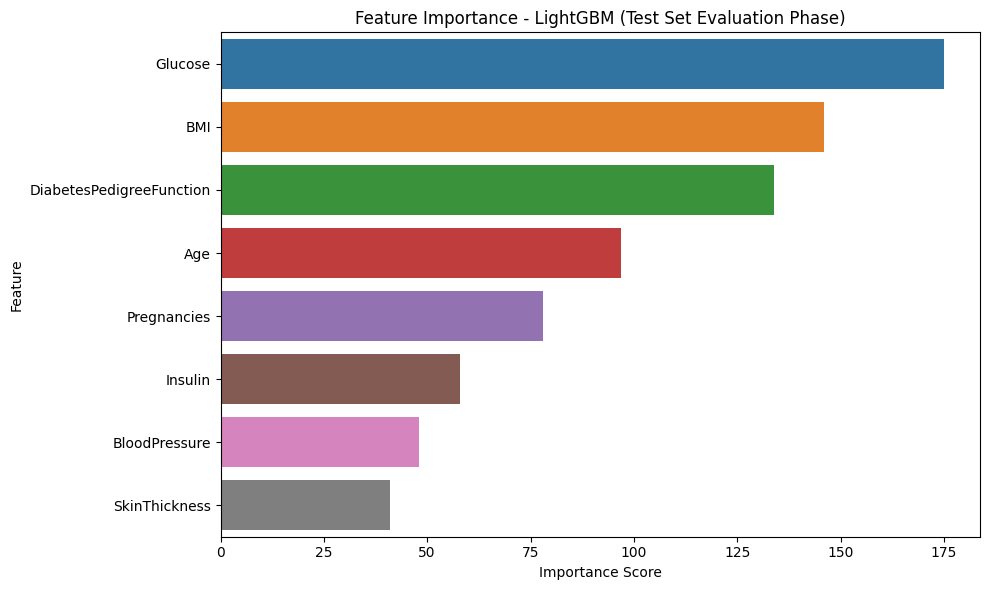

In [43]:
# --- Generate Feature Importance Plot (Example for LightGBM) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure best_lgbm_model exists and is your tuned LightGBM model
# Also make sure X (your original features DataFrame before scaling) exists to get column names

if 'best_lgbm_model' in locals() and best_lgbm_model is not None:
    print("\n--- Generating Feature Importances for LightGBM ---")

    # Get feature importances from the tuned model
    importances = best_lgbm_model.feature_importances_
    feature_names = X.columns # Get original feature names

    # Create a DataFrame for easier plotting
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort features by importance (descending)
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance - LightGBM (Test Set Evaluation Phase)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

else:
    print("\nSkipping LightGBM feature importance plot (model not available).")

# You could repeat a similar process for best_rf_model or best_xgb_model

--- Generating Target Variable Distribution Plot ---


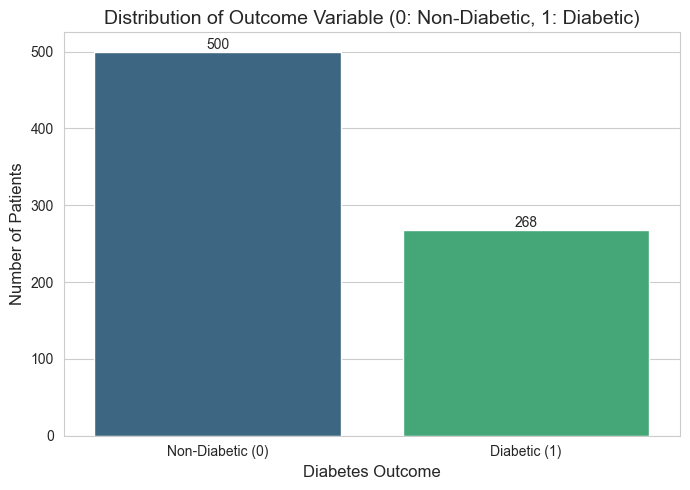


Value Counts for Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage for Outcome:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported


print("--- Generating Target Variable Distribution Plot ---")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(7, 5)) # Adjust figure size if needed
ax = sns.countplot(x='Outcome', data=df_cleaned, palette='viridis') # Use 'x' for vertical bars

# Add count labels above the bars
for container in ax.containers:
    ax.bar_label(container)

# Add titles and labels
plt.title('Distribution of Outcome Variable (0: Non-Diabetic, 1: Diabetic)', fontsize=14)
plt.xlabel('Diabetes Outcome', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic (0)', 'Diabetic (1)']) # Make x-axis labels clearer

# Show the plot
plt.tight_layout() # Adjust layout
plt.show()

# Also print the exact value counts and percentage
print("\nValue Counts for Outcome:")
print(df_cleaned['Outcome'].value_counts())
print("\nPercentage for Outcome:")
print(df_cleaned['Outcome'].value_counts(normalize=True) * 100)

--- Generating Bivariate Plots for Glucose vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


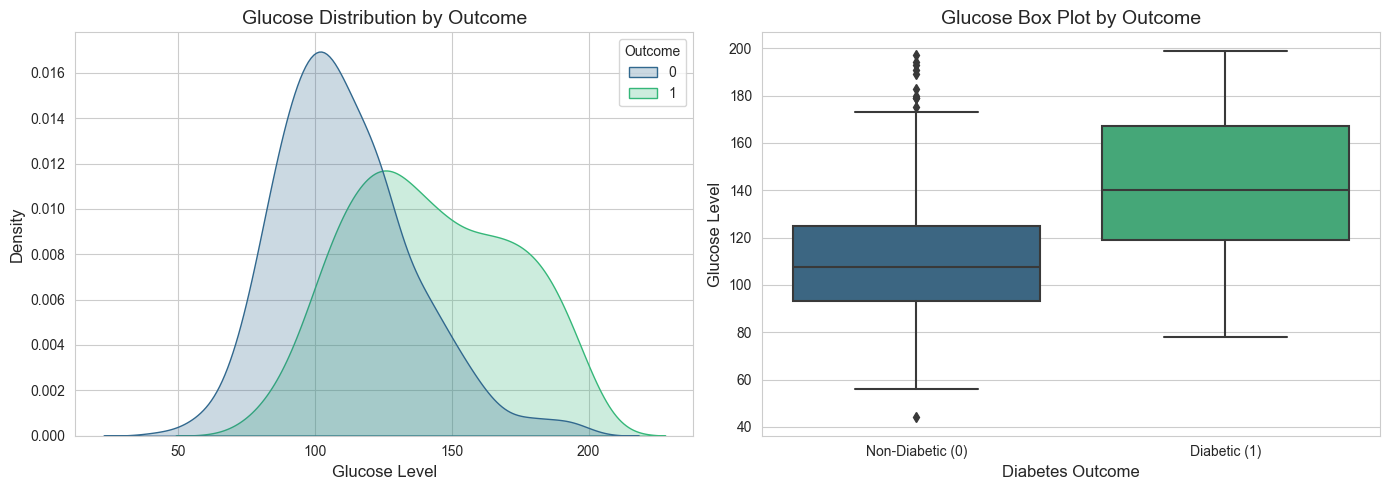


Bivariate plots for Glucose generated.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Ensure df_cleaned is your DataFrame after handling zero values
# If not defined, load it first.

print("--- Generating Bivariate Plots for Glucose vs Outcome ---")

# Set the aesthetic style
sns.set_style("whitegrid")

# Create a figure with two subplots, arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # Adjusted figure size

# --- Plot 1: KDE Plot comparing Glucose distributions per Outcome group ---
sns.kdeplot(data=df_cleaned, x='Glucose', hue='Outcome', fill=True,
            common_norm=False, palette='viridis', ax=axes[0])
axes[0].set_title('Glucose Distribution by Outcome', fontsize=14)
axes[0].set_xlabel('Glucose Level', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
# Optional: Add a legend if needed, though 'hue' often creates one
# axes[0].legend(title='Outcome', labels=['Diabetic (1)', 'Non-Diabetic (0)']) # Check labels match hue order

# --- Plot 2: Box Plot comparing Glucose values per Outcome group ---
sns.boxplot(x='Outcome', y='Glucose', data=df_cleaned, palette='viridis', ax=axes[1])
axes[1].set_title('Glucose Box Plot by Outcome', fontsize=14)
axes[1].set_xlabel('Diabetes Outcome', fontsize=12)
axes[1].set_ylabel('Glucose Level', fontsize=12)
axes[1].set_xticklabels(['Non-Diabetic (0)', 'Diabetic (1)']) # Set clearer x-axis labels

# Improve layout
plt.tight_layout()

# Display the plots
plt.show()

print("\nBivariate plots for Glucose generated.")

In [46]:
import pandas as pd
import numpy as np # Ensure numpy is imported

# Ensure the 'test_results' dictionary exists from the model evaluation step
if 'test_results' not in locals() or not isinstance(test_results, dict) or not test_results:
    print("Error: 'test_results' dictionary not found or is empty.")
    print("Please run the final model evaluation code block first.")
else:
    print("--- Generating Final Test Set Performance Summary Table ---")

    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(test_results).T # Transpose to have models as rows

    # Define desired column order (same as before)
    metric_order = ['Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall']

    # Get columns available in the DataFrame (in case AUC failed for some models)
    available_cols = [col for col in metric_order if col in results_df.columns]
    results_df = results_df[available_cols] # Reorder with available columns

    # Sort by a primary metric (e.g., AUC or F1-Score, descending)
    # Handle potential NaN in AUC when sorting
    if 'AUC' in results_df.columns:
        # Fill NaN with a very small number for sorting purposes only if needed
        results_df_sorted = results_df.sort_values(by='AUC', ascending=False, na_position='last')
    elif 'F1-Score' in results_df.columns:
        results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False, na_position='last')
    else:
        results_df_sorted = results_df # No sorting if key metrics missing

    # Display the formatted table (rounded to 4 decimal places)
    print("\nFinal Test Set Performance Summary:")
    print(results_df_sorted.round(4))

    # Optional: Save the table to a CSV file for easy import into your report
    # try:
    #     results_df_sorted.round(4).to_csv('final_model_performance_summary.csv')
    #     print("\nResults table saved to 'final_model_performance_summary.csv'")
    # except Exception as e:
    #     print(f"\nCould not save table to CSV: {e}")

--- Generating Final Test Set Performance Summary Table ---

Final Test Set Performance Summary:
                     Accuracy     AUC  F1-Score  Precision  Recall
LightGBM               0.7727  0.8280    0.6535     0.7021  0.6111
XGBoost                0.7273  0.8189    0.5714     0.6364  0.5185
Random Forest          0.7532  0.8157    0.6122     0.6818  0.5556
Decision Tree          0.6883  0.8109    0.3846     0.6250  0.2778
Logistic Regression    0.6883  0.8104    0.5200     0.5652  0.4815
KNN                    0.7468  0.8076    0.6061     0.6667  0.5556
SVM                    0.7078  0.8052    0.5263     0.6098  0.4630
GaussianNB             0.7013  0.7646    0.5965     0.5667  0.6296


--- Generating ROC Curve Comparison Plot for 8 models ---
Processing ROC for: Logistic Regression
Processing ROC for: KNN
Processing ROC for: Decision Tree
Processing ROC for: Random Forest
Processing ROC for: SVM
Processing ROC for: GaussianNB
Processing ROC for: XGBoost
Processing ROC for: LightGBM


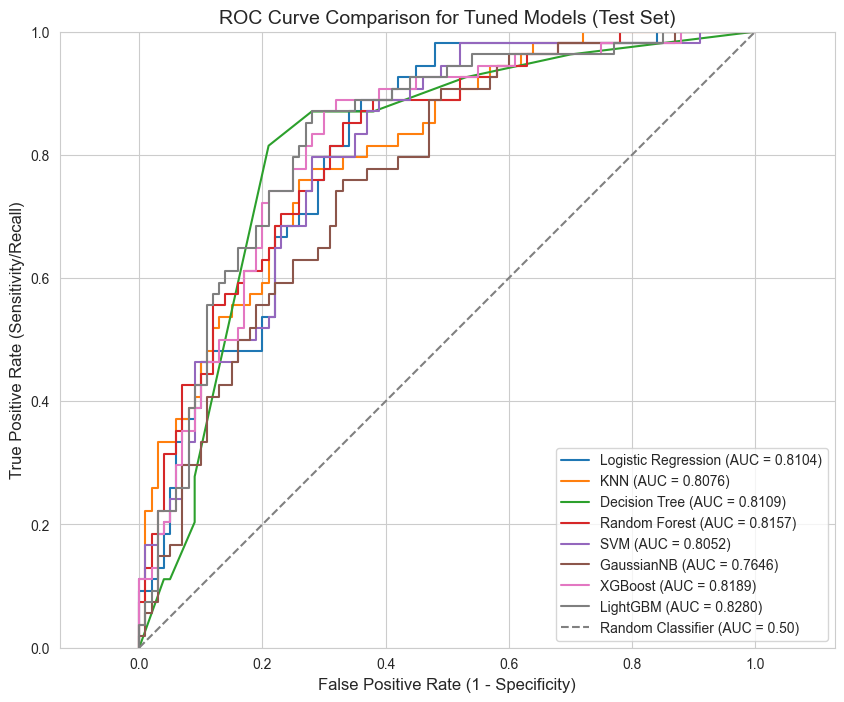


ROC Curve Comparison Plot generated.


In [47]:
# Import necessary functions
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns # For style
import numpy as np # For checking None

# --- Step 1: Gather all tuned models (same as before) ---
# Ensure these variables exist from your previous tuning steps!
tuned_models = {
    "Logistic Regression": best_log_reg_model if 'best_log_reg_model' in locals() else None,
    "KNN": best_knn_model if 'best_knn_model' in locals() else None,
    "Decision Tree": best_dt_model if 'best_dt_model' in locals() else None,
    "Random Forest": best_rf_model if 'best_rf_model' in locals() else None,
    "SVM": best_svm_model if 'best_svm_model' in locals() else None,
    "GaussianNB": best_gnb_model if 'best_gnb_model' in locals() else None,
    "XGBoost": best_xgb_model if 'best_xgb_model' in locals() else None,
    "LightGBM": best_lgbm_model if 'best_lgbm_model' in locals() else None
}

# Filter out any models that are None
valid_tuned_models = {name: model for name, model in tuned_models.items() if model is not None}

if not valid_tuned_models:
    print("Error: No valid tuned models found. Please check previous steps.")
else:
    print(f"--- Generating ROC Curve Comparison Plot for {len(valid_tuned_models)} models ---")

    # Set plot style
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 8)) # Create a figure to plot on

    # --- Loop through models, calculate ROC, and plot ---
    for name, model in valid_tuned_models.items():
        print(f"Processing ROC for: {name}")
        y_pred_proba = None
        model_auc = np.nan

        # Get probability predictions (need probability of positive class)
        if hasattr(model, "predict_proba"):
            try:
                # Probability of the positive class (Outcome=1)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                model_auc = roc_auc_score(y_test, y_pred_proba) # Recalculate AUC for consistency
            except Exception as e:
                print(f"  Warning: Could not get probabilities for {name}: {e}")
                continue # Skip this model if probabilities aren't available
        # Handle SVC specifically if probability=False was used during tuning
        elif isinstance(model, SVC) and not model.probability:
             print(f"  Warning: SVC for {name} needs probability=True for ROC curve. Skipping.")
             continue
        else:
             print(f"  Warning: Model {name} does not support predict_proba needed for ROC curve. Skipping.")
             continue

        # Calculate ROC curve points
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        # Plot the ROC curve for the current model
        plt.plot(fpr, tpr, label=f'{name} (AUC = {model_auc:.4f})')

    # --- Plot the diagonal line (random classifier) ---
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier (AUC = 0.50)')

    # --- Add labels, title, legend ---
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
    plt.title('ROC Curve Comparison for Tuned Models (Test Set)', fontsize=14)
    plt.legend(loc='lower right', fontsize=10) # Place legend
    plt.grid(True) # Add grid lines
    plt.axis('equal') # Optional: Make axes equal scale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # Display the plot
    plt.show()
    print("\nROC Curve Comparison Plot generated.")

--- Generating Target Variable Distribution Plot ---


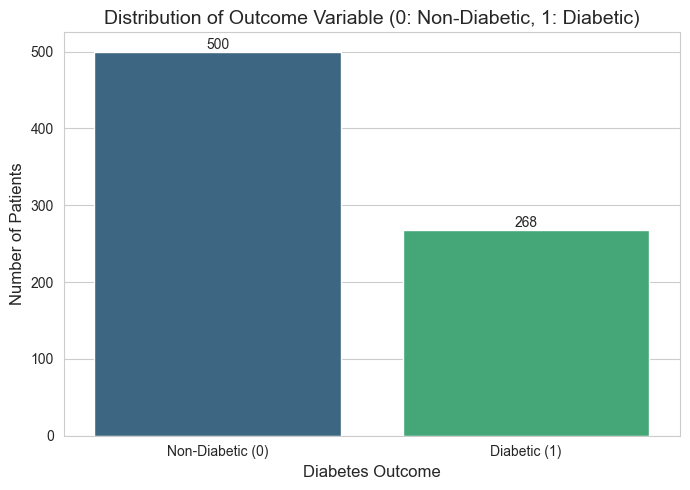


Value Counts for Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage for Outcome:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_cleaned is your cleaned DataFrame
print("--- Generating Target Variable Distribution Plot ---")
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Outcome', data=df_cleaned, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Outcome Variable (0: Non-Diabetic, 1: Diabetic)', fontsize=14)
plt.xlabel('Diabetes Outcome', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.tight_layout()
plt.show()
print("\nValue Counts for Outcome:")
print(df_cleaned['Outcome'].value_counts())
print("\nPercentage for Outcome:")
print(df_cleaned['Outcome'].value_counts(normalize=True) * 100)

--- Generating Bivariate Plots for Glucose vs Outcome ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


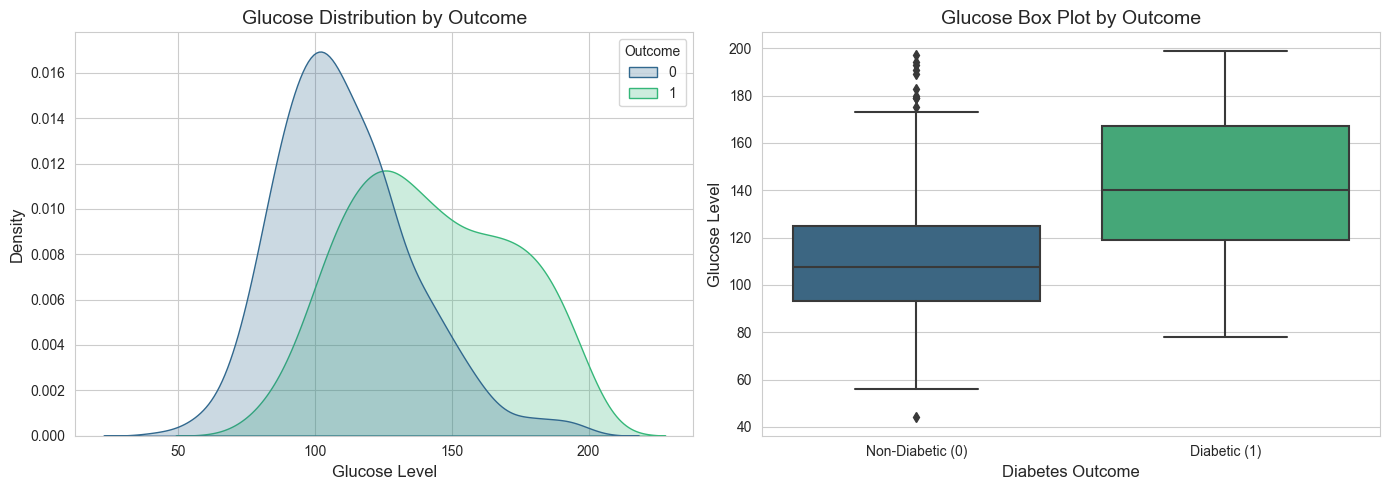

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_cleaned is your cleaned DataFrame
print("--- Generating Bivariate Plots for Glucose vs Outcome ---")
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# KDE Plot
sns.kdeplot(data=df_cleaned, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette='viridis', ax=axes[0])
axes[0].set_title('Glucose Distribution by Outcome', fontsize=14)
axes[0].set_xlabel('Glucose Level', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
# Box Plot
sns.boxplot(x='Outcome', y='Glucose', data=df_cleaned, palette='viridis', ax=axes[1])
axes[1].set_title('Glucose Box Plot by Outcome', fontsize=14)
axes[1].set_xlabel('Diabetes Outcome', fontsize=12)
axes[1].set_ylabel('Glucose Level', fontsize=12)
axes[1].set_xticklabels(['Non-Diabetic (0)', 'Diabetic (1)'])
plt.tight_layout()
plt.show()

--- Generating Univariate Analysis Plots for Appendix ---

--- Plotting Feature: Pregnancies ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


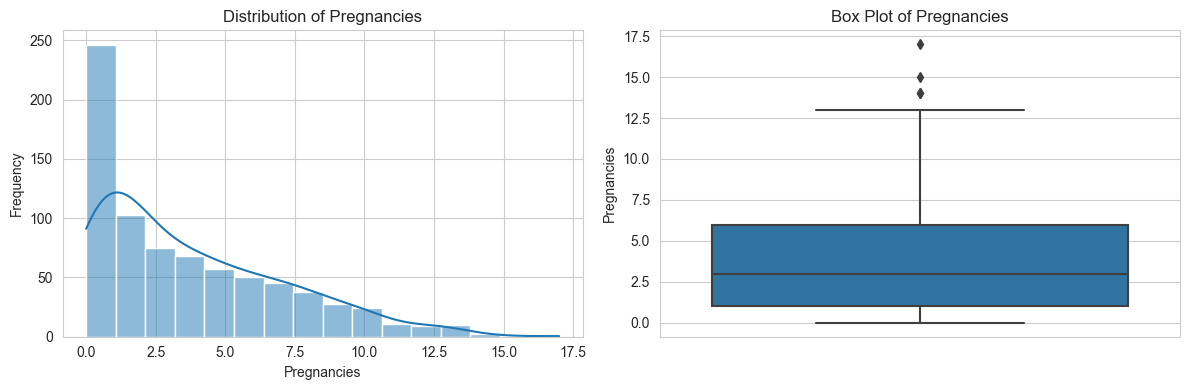


--- Plotting Feature: Glucose ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


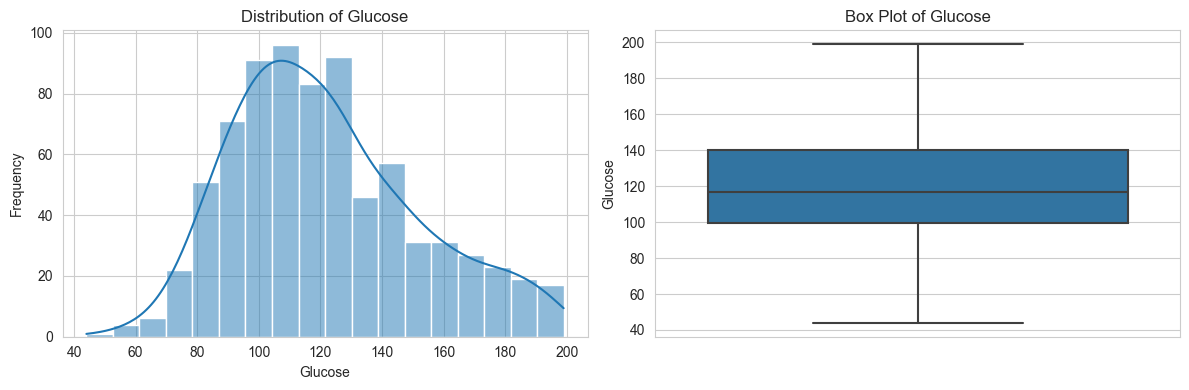


--- Plotting Feature: BloodPressure ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


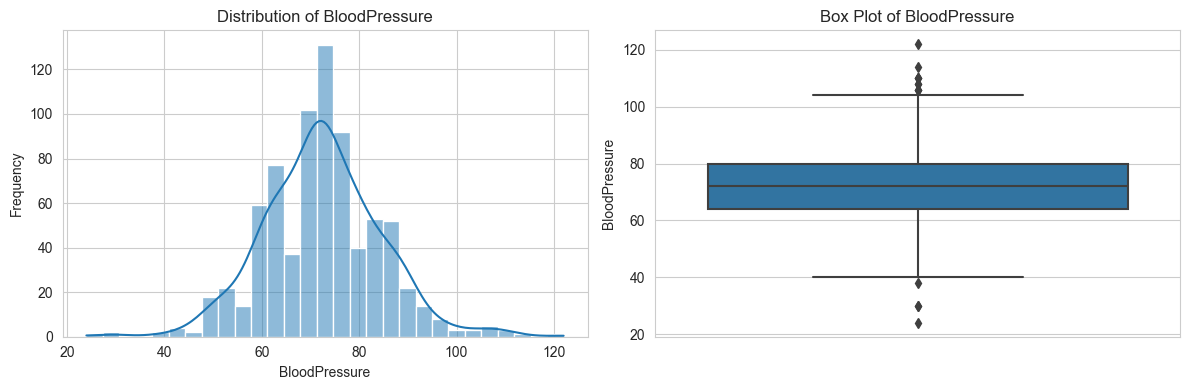


--- Plotting Feature: SkinThickness ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


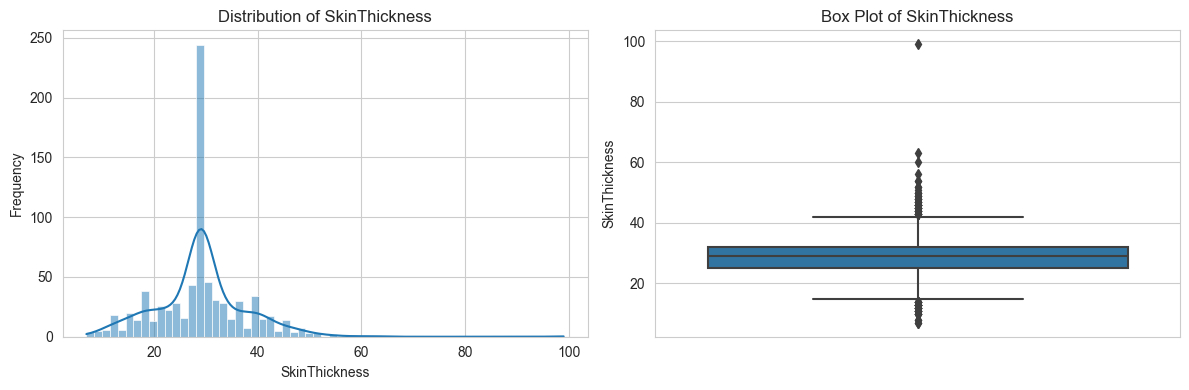


--- Plotting Feature: Insulin ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


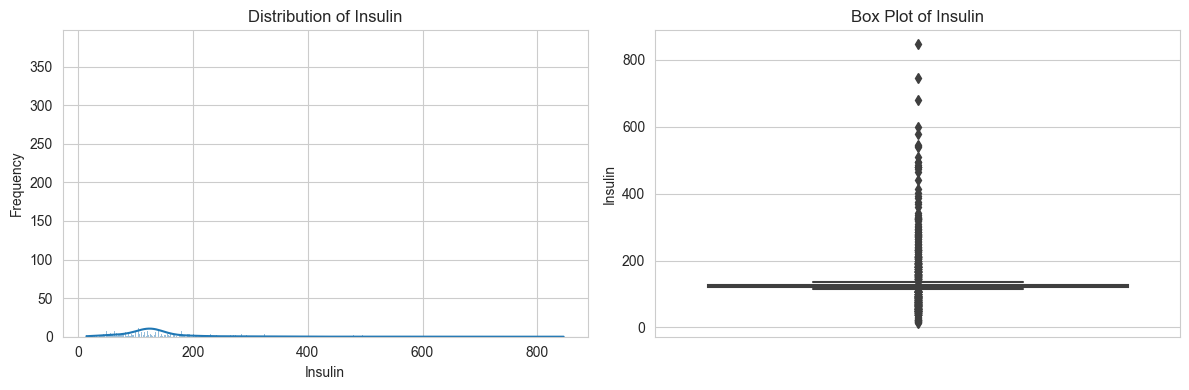


--- Plotting Feature: BMI ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


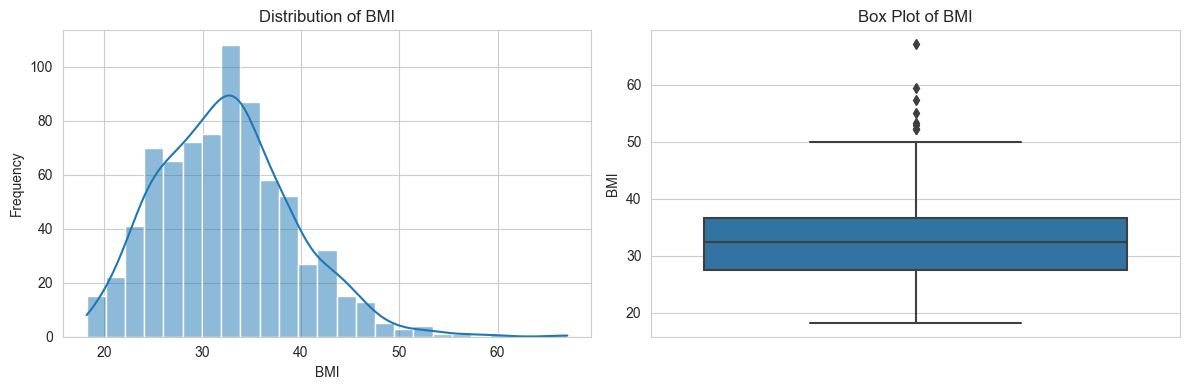


--- Plotting Feature: DiabetesPedigreeFunction ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


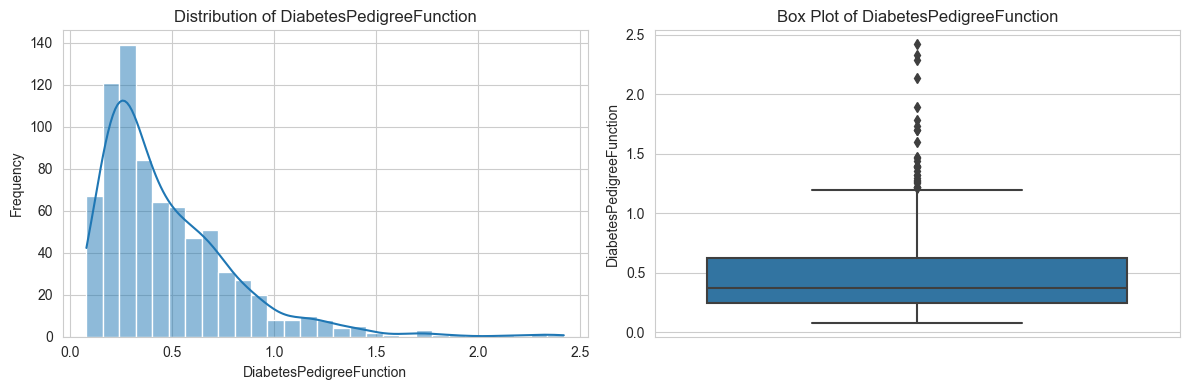


--- Plotting Feature: Age ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


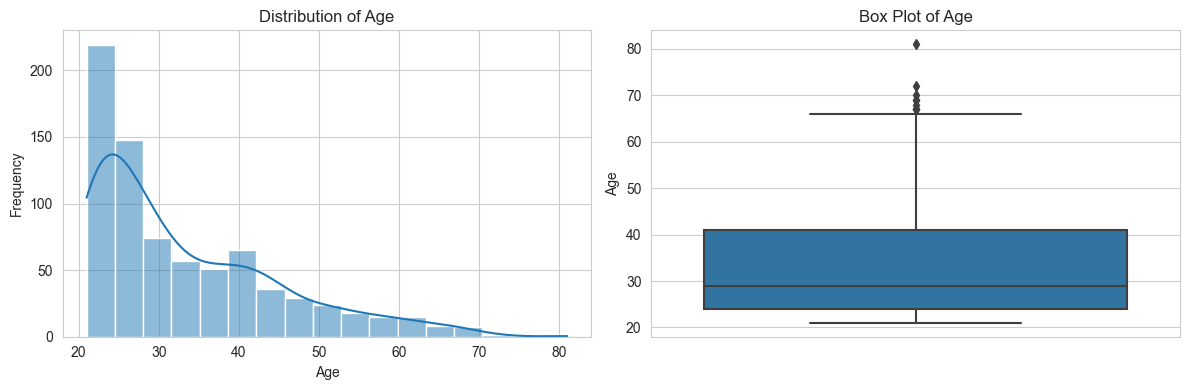

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_cleaned exists
print("--- Generating Univariate Analysis Plots for Appendix ---")
feature_columns = df_cleaned.drop('Outcome', axis=1).columns
sns.set_style("whitegrid")

for col in feature_columns:
    print(f"\n--- Plotting Feature: {col} ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # Histogram
    sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    # Box Plot
    sns.boxplot(data=df_cleaned, y=col, ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)
    plt.tight_layout()
    plt.show() # Show plot for each feature

--- Generating Glucose Distribution Plot (Before vs After Imputation) ---


/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pratyushdhavala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


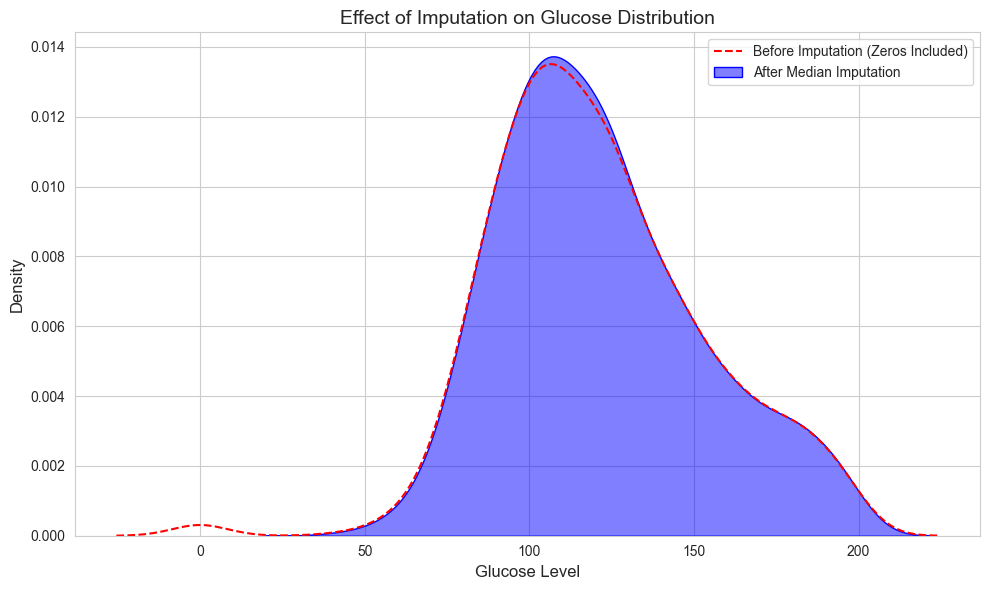


Note: The 'Before' curve includes the spike at zero, which is replaced in the 'After' curve.


In [51]:
# --- Generate Plot Showing Effect of Imputation on Glucose ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure you have the original DataFrame 'df' (before cleaning)
# and the cleaned DataFrame 'df_cleaned' (after imputation)

if 'df' in locals() and 'df_cleaned' in locals():
    print("--- Generating Glucose Distribution Plot (Before vs After Imputation) ---")
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot KDE for original Glucose (including zeros)
    sns.kdeplot(df['Glucose'], label='Before Imputation (Zeros Included)', color='red', linestyle='--')

    # Plot KDE for cleaned Glucose (zeros imputed)
    sns.kdeplot(df_cleaned['Glucose'], label='After Median Imputation', color='blue', fill=True, alpha=0.5)

    plt.title('Effect of Imputation on Glucose Distribution', fontsize=14)
    plt.xlabel('Glucose Level', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nNote: The 'Before' curve includes the spike at zero, which is replaced in the 'After' curve.")

else:
    print("Error: Original DataFrame 'df' or cleaned DataFrame 'df_cleaned' not found.")